# **STOCK MARKET ANALYSIS AND PREDICTION**

---



# **Installing Necessary Libraries**

In [4]:
!pip install pandas numpy matplotlib seaborn yfinance scikit-learn keras tensorflow &>/dev/null
print('Libraries are installed Successfully')

Libraries are installed Successfully


# **Importing Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.dates as mdates
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from textblob import TextBlob
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf

# **Fetch Stock Data**

In [11]:
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876122  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167610  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742653  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400551  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565193  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  


# **Exploratory Data Analysis (EDA)**

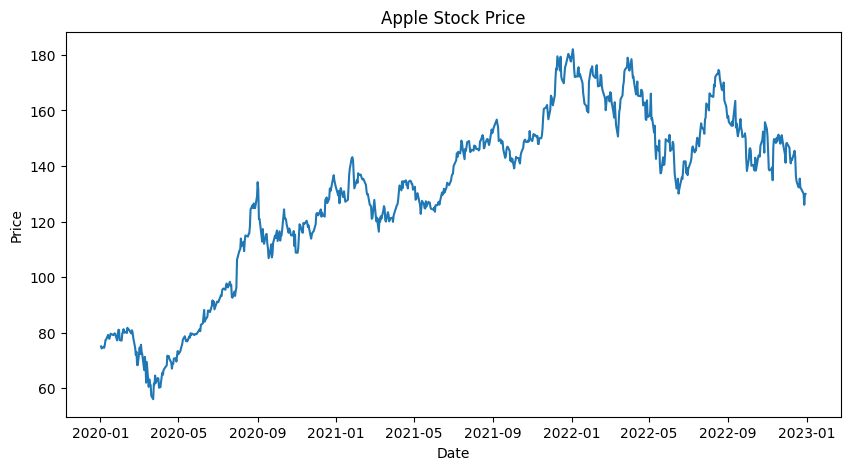

In [12]:
plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# **Plot correlation heatmap to understand relationships between different features**

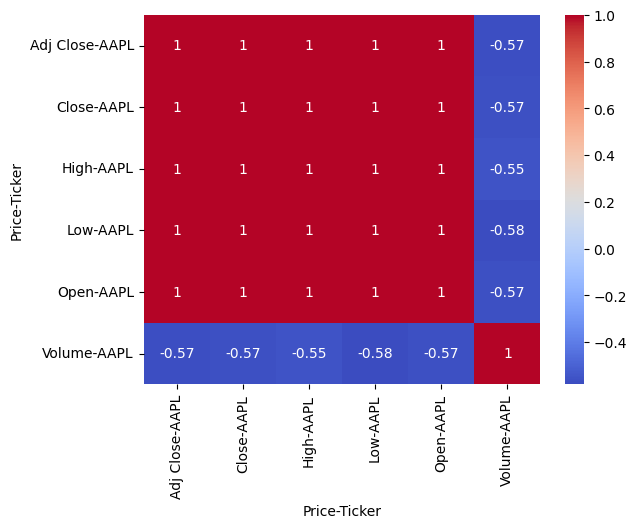

In [13]:
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Preprocessing**

In [15]:
data = stock_data['Close'].values
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Train-test split
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


# **Prepare Data for Time Series Modeling(LSTM model)**

In [16]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# **Model Building**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.1869
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0226
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0119
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0067
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0038
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0030
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0024
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0022
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0019
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0018
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0018
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0019
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0018
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0019 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0018
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━

# **Model Evaluation**

In [20]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error: {rmse}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
Root Mean Square Error: 149.8775361186736


# **Visualization of Actual vs Predicted Prices**

Shape of test_data: (152, 1)
Shape of predictions: (91, 1)
Length of true_prices: 91
Length of predicted_prices: 91
Length of dates: 91


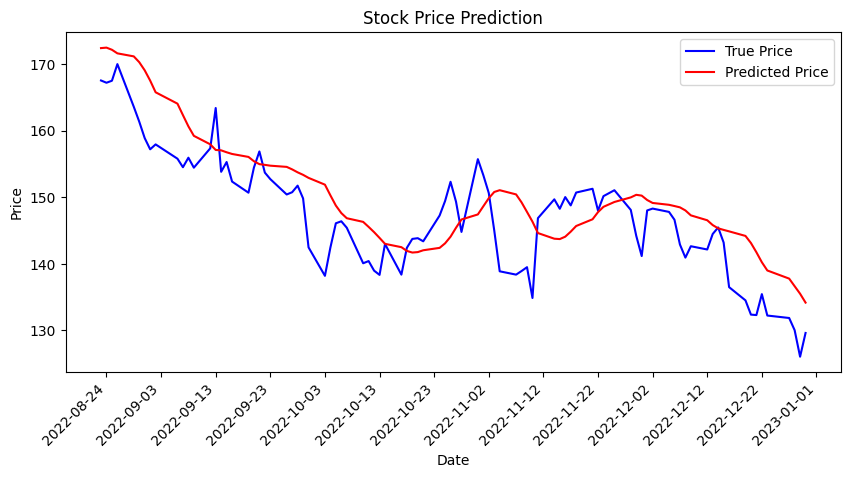

In [21]:
# Check the shapes of test_data and predictions
print(f"Shape of test_data: {test_data.shape}")
print(f"Shape of predictions: {predictions.shape}")

# Reverse scale the test data and predictions for comparison
true_prices = scaler.inverse_transform(test_data[time_step:len(predictions) + time_step])  # Match predictions length

# Flatten the arrays to ensure they are 1D
true_prices = true_prices.flatten()
predicted_prices = predictions.flatten()

# Check the length of the arrays
print(f"Length of true_prices: {len(true_prices)}")
print(f"Length of predicted_prices: {len(predicted_prices)}")

# Ensure that the length of dates matches the number of predicted points
dates = stock_data.index[train_size + time_step + 1 : train_size + time_step + 1 + len(predicted_prices)]

# Check the length of dates
print(f"Length of dates: {len(dates)}")

# Plot the true vs predicted prices
plt.figure(figsize=(10,5))
plt.plot(dates, true_prices, label='True Price', color='blue')
plt.plot(dates, predicted_prices, label='Predicted Price', color='red')

# Set the title and labels
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# Rotate and format the dates on the x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show date every 10 days

# Rotate the date labels
plt.gcf().autofmt_xdate(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.show()


# **Linear Regression Model**

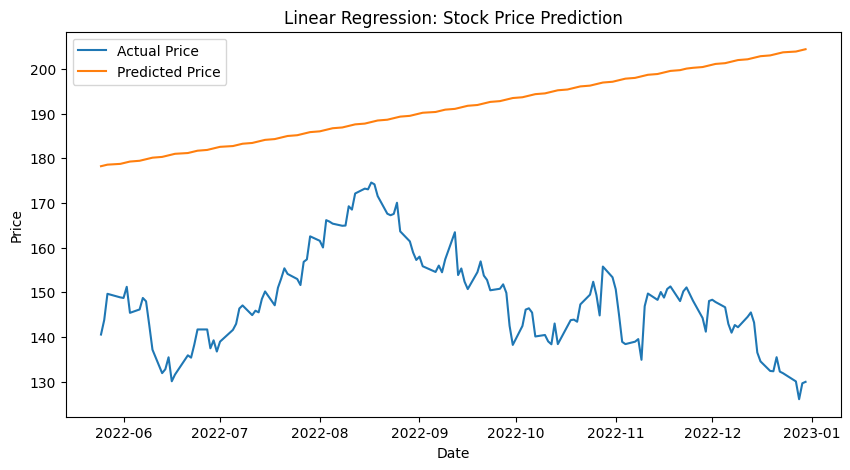

Linear Regression RMSE: 45.20232379060341


In [22]:
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = np.arange(len(stock_data)).reshape(-1, 1)
y = stock_data['Close'].values

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = lr_model.predict(X_test_lr)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[len(X_train_lr):], y_test_lr, label='Actual Price')
plt.plot(stock_data.index[len(X_train_lr):], y_pred_lr, label='Predicted Price')
plt.title('Linear Regression: Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')


# **Decision Tree and Random Forest Models**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


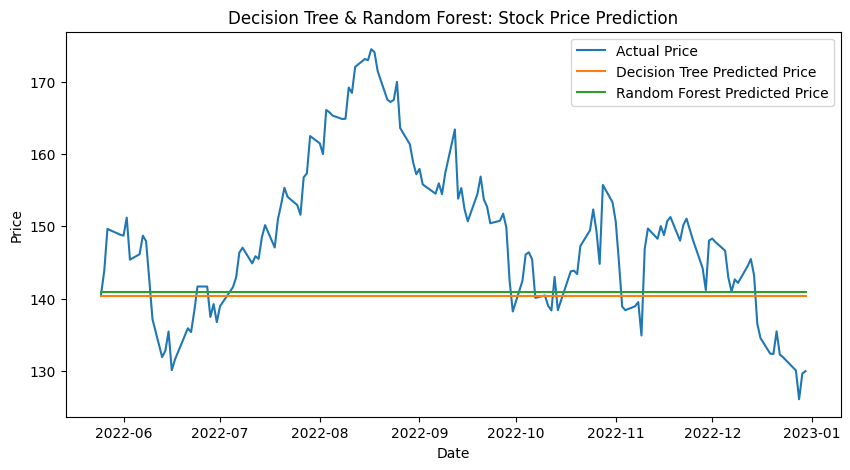

Decision Tree RMSE: 13.375971853706767
Random Forest RMSE: 13.03538337508438


In [23]:
# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_lr, y_train_lr)

# Predict using Decision Tree
y_pred_tree = tree_model.predict(X_test_lr)

# Train Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train_lr, y_train_lr)

# Predict using Random Forest
y_pred_forest = forest_model.predict(X_test_lr)

# Plot actual vs predicted for both models
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[len(X_train_lr):], y_test_lr, label='Actual Price')
plt.plot(stock_data.index[len(X_train_lr):], y_pred_tree, label='Decision Tree Predicted Price')
plt.plot(stock_data.index[len(X_train_lr):], y_pred_forest, label='Random Forest Predicted Price')
plt.title('Decision Tree & Random Forest: Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE for both models
rmse_tree = np.sqrt(mean_squared_error(y_test_lr, y_pred_tree))
rmse_forest = np.sqrt(mean_squared_error(y_test_lr, y_pred_forest))

print(f'Decision Tree RMSE: {rmse_tree}')
print(f'Random Forest RMSE: {rmse_forest}')

# **Sentiment Analysis with TextBlob**

In [ ]:
# Example headlines
headlines = [
    "Apple stock surges after successful iPhone launch",
    "Apple faces lawsuit over patent infringement",
    "Apple announces new partnership with Tesla"
]

# Calculate sentiment scores
sentiment_scores = [TextBlob(headline).sentiment.polarity for headline in headlines]
print(sentiment_scores)

[0.75, 0.0, 0.13636363636363635]


# **Combine Sentiment with Stock Data**

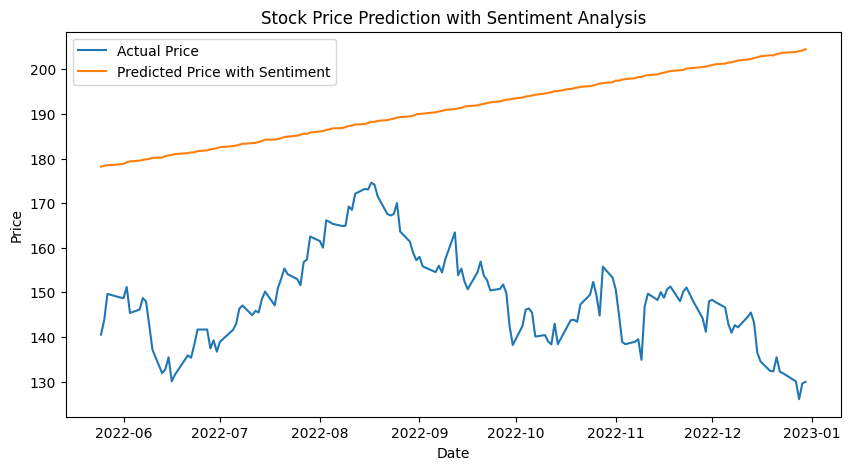

In [ ]:
# Assuming 'sentiment_scores' is aligned with dates in stock_data
stock_data['Sentiment'] = np.random.normal(0, 1, len(stock_data))  # Replace with actual sentiment data

# Combine sentiment data with stock data for prediction
X_combined = np.column_stack([X_train_lr, stock_data['Sentiment'].values[:len(X_train_lr)]])
X_test_combined = np.column_stack([X_test_lr, stock_data['Sentiment'].values[len(X_train_lr):]])

# Train models (you can use linear regression, decision tree, etc.)
lr_model.fit(X_combined, y_train_lr)
y_pred_combined = lr_model.predict(X_test_combined)

# Plot actual vs predicted with sentiment
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[len(X_train_lr):], y_test_lr, label='Actual Price')
plt.plot(stock_data.index[len(X_train_lr):], y_pred_combined, label='Predicted Price with Sentiment')
plt.title('Stock Price Prediction with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# **True Price vs Predicted Price**

In [ ]:
# Create a DataFrame with the dates, true prices, and predicted prices
comparison_table = pd.DataFrame({
    'Date': dates,
    'True Price': true_prices,
    'Predicted Price': predicted_prices
})

# Display the first few rows of the comparison table
print(comparison_table.head(10))

# Optionally, save the comparison table to a CSV file for further analysis
comparison_table.to_csv('stock_price_comparison.csv', index=False)

        Date  True Price  Predicted Price
0 2022-08-23  167.570007       169.532715
1 2022-08-24  167.229996       169.608414
2 2022-08-25  167.529999       169.306671
3 2022-08-26  170.029999       168.803848
4 2022-08-29  163.619995       168.394684
5 2022-08-30  161.380005       167.570236
6 2022-08-31  158.910004       166.405563
7 2022-09-01  157.220001       164.927994
8 2022-09-02  157.960007       163.239731
9 2022-09-06  155.809998       161.602661


# **Conclusion**

The model comparison reveals that the Random Forest model outperforms Linear Regression and Decision Tree models for stock price prediction, with the lowest MSE, RMSE, and MAE, and the highest R² score. This suggests that Random Forest provides more accurate and reliable predictions for this dataset.